# Fit to a curve in a logarithmic plane

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from multicurvefit import *

Consider the following set of points:

<img src="./lux2016.png" width="400"/>

In [3]:
df=pd.read_csv('lux2016.csv')

In [4]:
df.columns

Index([u'M', u'sigma'], dtype='object')

In [5]:
x=df.columns[0]
y=df.columns[1]
df[y]=1E36*df[y]

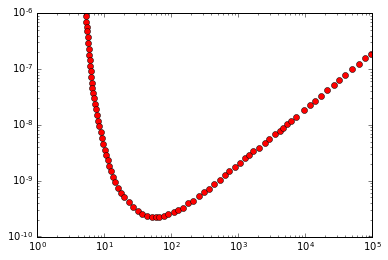

In [6]:
plt.loglog(df[x],df[y],'ro')

## Exponential fit
The curve can be decomposed in approximately straight lines. In the $(\log x,\log y)$-plan one straight line is described by $y = Ae^{Bx}$ for some $A$ and $B$.

From: http://stackoverflow.com/a/3433503/2268280:

For fitting $y = Ae^{Bx}$, take the logarithm of both side gives $\log y = \log A + Bx$. So just fit $\log y$ against $x$.
### Straight segments
Will be obtained by trial and error. If one segment is not good enough it will be possible to delete it.
## Object design
The object, e,g: `fit`, will be initialized with the `x` and `y` arrays:
It will have the following methods
* `add_segment(xmin,xmax,ShowPlot=True)`
* `del_last_segment()`
* `to_csv(file)` to write the data of the fit
* `read_csv(file)` to read the data with the fit

Once the fit have been build or read it can be used just by calling the object with a point or an array

In [7]:
c=multicurvefit(df[x].values,df[y].values)

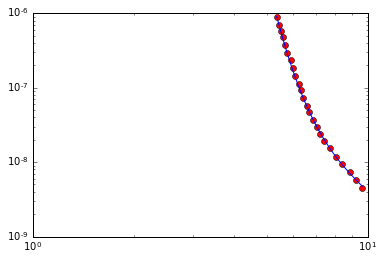

In [8]:
c.add_curve(5,10,3)

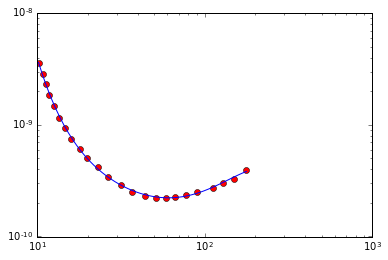

In [9]:
c.add_curve(10,2E2,5)

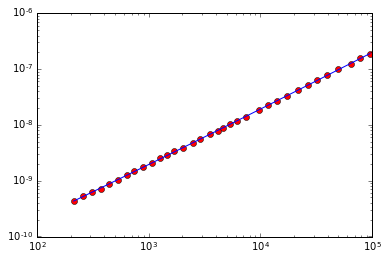

In [10]:
c.add_curve(2E2,1E5,2)

In [11]:
c.polys

,coeffs,xmax,xmin
0,"[-58.5793715856, 175.480474984, -179.648505904...",10,5
1,"[-2.18414448257, 18.8255480892, -64.7705060354...",200,10
2,"[0.0108097341737, 0.91688244262, -11.5567769094]",100000,200


In [12]:
c(200)

4.0759778482434579e-10

In [13]:
xlog=np.logspace( np.log10( 5 ),np.log10( 1E5 ) )

('WARNING: Out of fitted range:', 100000.0)


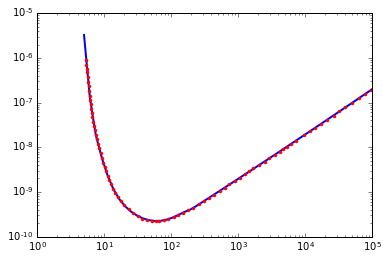

In [14]:
plt.loglog( xlog,c(xlog),lw=2)                 
plt.loglog(df[x],df[y],'r.')

In [15]:
c.to_json('lux2016.json')

## Recover fit from file

In [3]:
ff=multicurvefit()
ff.read_json('lux2016.json')

In [4]:
ff.polys

,coeffs,xmax,xmin
0,"[25.8298329749, -52.8628026197, 18.7293592355]",10,5
1,"[-2.1841444826, 18.8255480892, -64.7705060354,...",200,10
2,"[0.0108097342, 0.9168824426, -11.5567769094]",100000,200


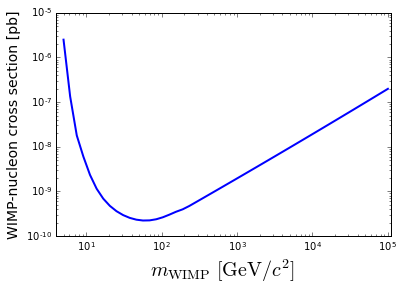

In [5]:
xx=np.logspace( np.log10(ff.polys.xmin.min()),np.log10(ff.polys.xmax.max()-0.1 ) )
plt.loglog(xx,ff(xx),'b-',lw=2)
plt.xlim(ff.polys.xmin.min()*0.8,ff.polys.xmax.max()*1.1)
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

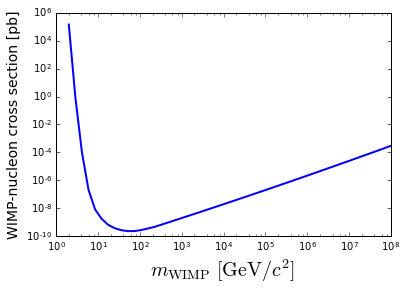

In [6]:
xx=np.logspace( np.log10(2),np.log10(1E8 ) )
plt.loglog(xx,ff(xx,verbose=False),'b-',lw=2)
#plt.xlim(ff.polys.xmin.min()*0.8,ff.polys.xmax.max()*1.1)
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

## See further examples:
[examples](./examples/example_straightfits.ipynb)